## Problem Satement
#### XYZ Co's 2014-2018 sales data to identify key revenue and profit drivers across products, channels, and regions, uncover seasonal trends and outliers, and align perfomance against budgets.Use these insights to optimize prizung, promotions and market expansion for sustainable growth and reduced concentration risk.
    



In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sheets = pd.read_excel("Sales Dataset.xlsx",sheet_name = None)

In [3]:
# Assign DataFrame for each sheets

df_sales = sheets["Sales Orders"]
df_customers = sheets['Customers']
df_products=sheets['Products']
df_regions = sheets['Regions']
df_state_reg =sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [4]:
print("df_sales shape:",(df_sales.shape))
print("df_customers shape:",(df_customers.shape))
print("df_products shape:",(df_products.shape))
print("df_regions shape:",(df_regions.shape))
print("df_state_reg shape:",(df_state_reg.shape))
print("df_budgets shape:",(df_budgets.shape))



df_sales shape: (64104, 12)
df_customers shape: (175, 2)
df_products shape: (30, 2)
df_regions shape: (994, 15)
df_state_reg shape: (49, 3)
df_budgets shape: (30, 2)


In [5]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [6]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [7]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [8]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [9]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [10]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [11]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [12]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [13]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [14]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [15]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [16]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [17]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

#### Data Cleaning And Wrangling

In [18]:
# Merge with Customers
df = df_sales.merge(
    df_customers,how ='left',
    left_on = "Customer Name Index",
    right_on ="Customer Index"
)

In [19]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [20]:
# Merge with Customers
df = df.merge(
    df_products, how ='left',
    left_on ='Product Description Index',
    right_on ='Index'
)
    

In [21]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [22]:
# Merge with Regions

df = df.merge(
    df_regions, how ='left',
    left_on ='Delivery Region Index',
    right_on ='id'
)

In [23]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [24]:
# Merge with State Region

df = df.merge(
    df_state_reg[["State Code","Region"]],
    how ='left',
    left_on ='state_code',
    right_on ='State Code'
)

In [25]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [26]:
# Merge with Budgets

df = df.merge(
    df_budgets,
    how ='left',
    on ='Product Name'
)

In [27]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'Region', '2017 Budgets'],
      dtype='object')

In [28]:
# Customer Index
# State Code
# State Code_x
# Region_x
# Region_y
# State Code_y
#id
#Index

# Clean up redundant columns
cols_to_drop=['Customer Index','State Code','State Code_x','State Code_y','Region_x','Region_y','id','Index']
df =df.drop(columns = cols_to_drop,errors='ignore')


In [29]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


#### Convert all columns into lower case for consistency and essier access

In [30]:
df.columns =df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

#### Keep the columne we need and delete columnes that we don't need

In [31]:
cols_to_keep=['ordernumber', 'orderdate', 'channel',
             'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'county', 'state_code', 'state', 'latitude',
       'longitude', 'region','2017 budgets']
df =df[cols_to_keep]

In [32]:
df.head(1)

,ordernumber,orderdate,channel,order quantity,unit price,line total,total unit cost,customer names,product name,county,state_code,state,latitude,longitude,region,2017 budgets
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,32.08354,-81.09983,South,964940.231


In [33]:
# Rename columns

df = df.rename(columns ={'ordernumber':'order_number','orderdate' : 'order_date','order quantity':'order_quantity',
'unit price':'unit_price','line total':'revenue','unit price':'unit_price','total unit cost':'total_unit_cost','customer names':'customer_name',
'product name':'product_name','state_code':'state','state':'state_name','latitude':'lat','longitude':'lon','2017 budgets':'budget'})

df.head(1)


,order_number,order_date,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_name,product_name,county,state,state_name,lat,lon,region,budget
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,32.08354,-81.09983,South,964940.231


In [34]:
#### blank out budgets fro non 2017 budgets
df.loc[df['order_date'].dt.year !=2017,'budget']=pd.NA

df[['order_date','product_name','revenue','budget']]

df.head(5)

,order_number,order_date,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_name,product_name,county,state,state_name,lat,lon,region,budget
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,32.08354,-81.09983,South,NaN
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,39.61366,-86.10665,Midwest,NaN
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,CA,California,37.66243,-121.87468,West,NaN
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,IN,Indiana,39.16533,-86.52639,Midwest,NaN
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,CT,Connecticut,41.77524,-72.52443,Northeast,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   channel          64104 non-null  object        
 3   order_quantity   64104 non-null  int64         
 4   unit_price       64104 non-null  float64       
 5   revenue          64104 non-null  float64       
 6   total_unit_cost  64104 non-null  float64       
 7   customer_name    64104 non-null  object        
 8   product_name     64104 non-null  object        
 9   county           64104 non-null  object        
 10  state            64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  lat              64104 non-null  float64       
 13  lon              64104 non-null  float64       
 14  region           64104 non-null  objec

In [36]:
#### Filter the dataset to include only records from year 2017

df_2017=df[df['order_date'].dt.year ==2017]


In [37]:
df_2017.head(5)

,order_number,order_date,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_name,product_name,county,state,state_name,lat,lon,region,budget
46363,SO - 0002544,2017-01-01,Wholesale,6,1239.5,7437.0,1028.785,NCS Group,Product 30,Hudson County,NJ,New Jersey,40.77955,-74.02375,Northeast,1011609.684
46364,SO - 0006431,2017-01-01,Wholesale,5,1829.1,9145.5,1207.206,Epic Group,Product 13,Mesa County,CO,Colorado,39.06387,-108.55065,West,3720639.645
46365,SO - 0007491,2017-01-01,Wholesale,9,2412.0,21708.0,1664.280,State Ltd,Product 15,Los Angeles County,CA,California,33.96168,-118.35313,West,3299478.315
46366,SO - 0008741,2017-01-01,Wholesale,8,904.5,7236.0,750.735,Fivebridge Ltd,Product 8,Dubuque County,IA,Iowa,42.50056,-90.66457,Midwest,1085037.329
46367,SO - 0009295,2017-01-01,Wholesale,12,1112.2,13346.4,811.906,Tagfeed Ltd,Product 2,Hernando County,FL,Florida,28.47689,-82.52546,South,3050087.565


In [38]:
df['total_cost']=df['order_quantity']*df['total_unit_cost']



In [39]:
df['profit'] =df['revenue']-df['total_cost']

df['profit_margin_%']=df['profit']/df['revenue'] * 100

In [40]:
df.head(5)

,order_number,order_date,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_name,product_name,county,state,state_name,lat,lon,region,budget,total_cost,profit,profit_margin_%
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,32.08354,-81.09983,South,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,39.61366,-86.10665,Midwest,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,CA,California,37.66243,-121.87468,West,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,IN,Indiana,39.16533,-86.52639,Midwest,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,CT,Connecticut,41.77524,-72.52443,Northeast,NaN,10082.160,8249.040,45.0


## EDA

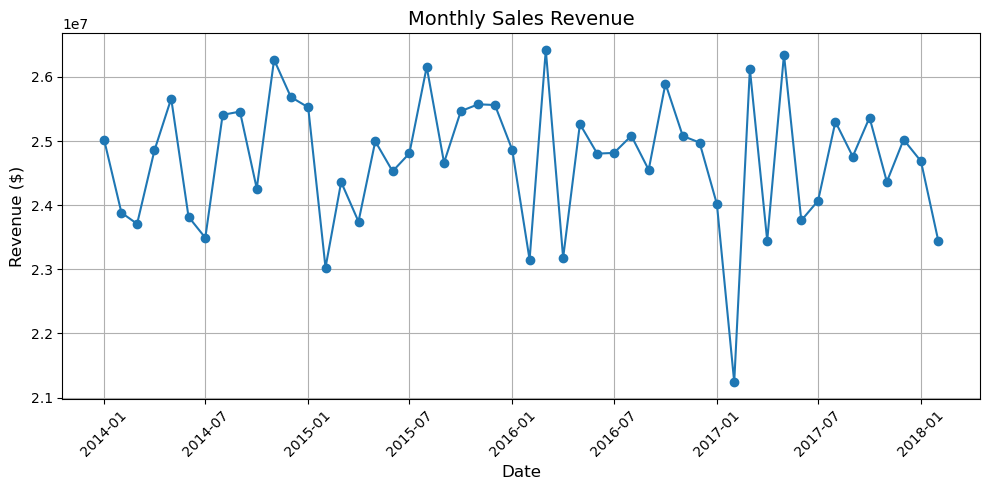

In [49]:
df['order_date'] = pd.to_datetime(df['order_date'])

# Group by month and sum revenue
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['revenue'].sum().reset_index()

# Convert period to datetime for plotting
monthly_sales['order_date'] = monthly_sales['order_date'].dt.to_timestamp()

# Create the line chart
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['order_date'], monthly_sales['revenue'], marker='o')
plt.title('Monthly Sales Revenue', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [50]:
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter out records from January 2018 and February 2018
df_1 = df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))]




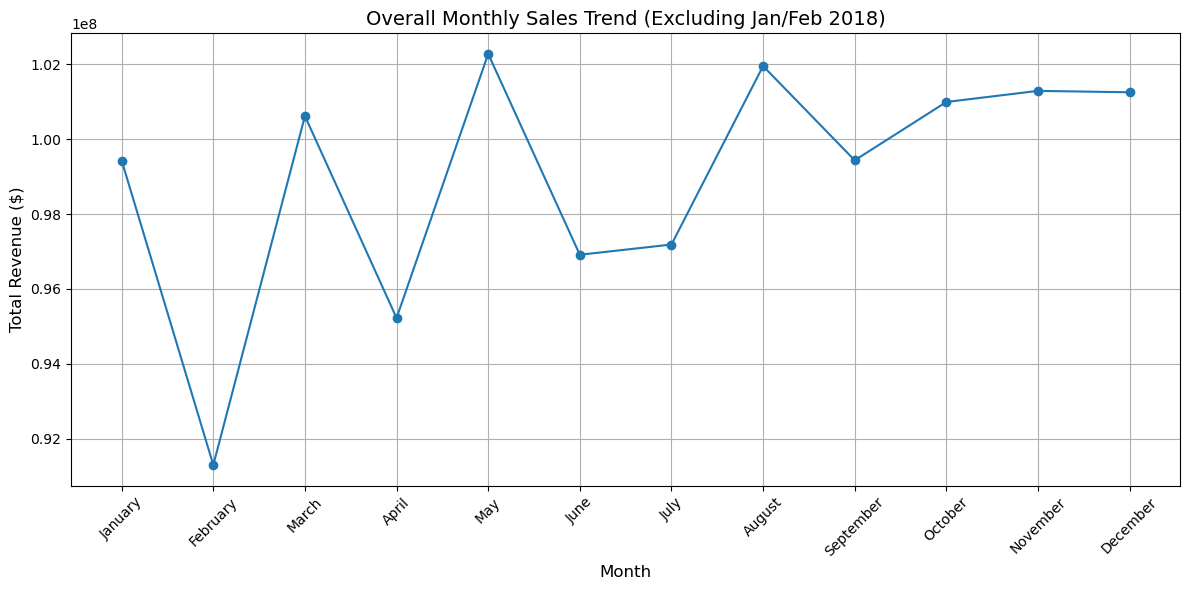

In [54]:

# Assuming df is defined with 'order_date' and 'revenue' columns
# Filter out records from January 2018 and February 2018, and create a copy
df_1 = df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))].copy()

# Convert order_date to datetime (on the copy, avoiding SettingWithCopyWarning)
df_1['order_date'] = pd.to_datetime(df_1['order_date'], errors='coerce')

# Check for invalid dates
if df_1['order_date'].isna().any():
    print("Warning: Some order_date values are invalid or missing. These will be excluded.")

# Extract month name for grouping
df_1['month'] = df_1['order_date'].dt.month_name()

# Group by month and sum revenue across all years
monthly_trend = df_1.groupby('month')['revenue'].sum().reset_index()

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('month')

# Create the line chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['month'], monthly_trend['revenue'], marker='o')
plt.title('Overall Monthly Sales Trend (Excluding Jan/Feb 2018)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

#### Top 10 products


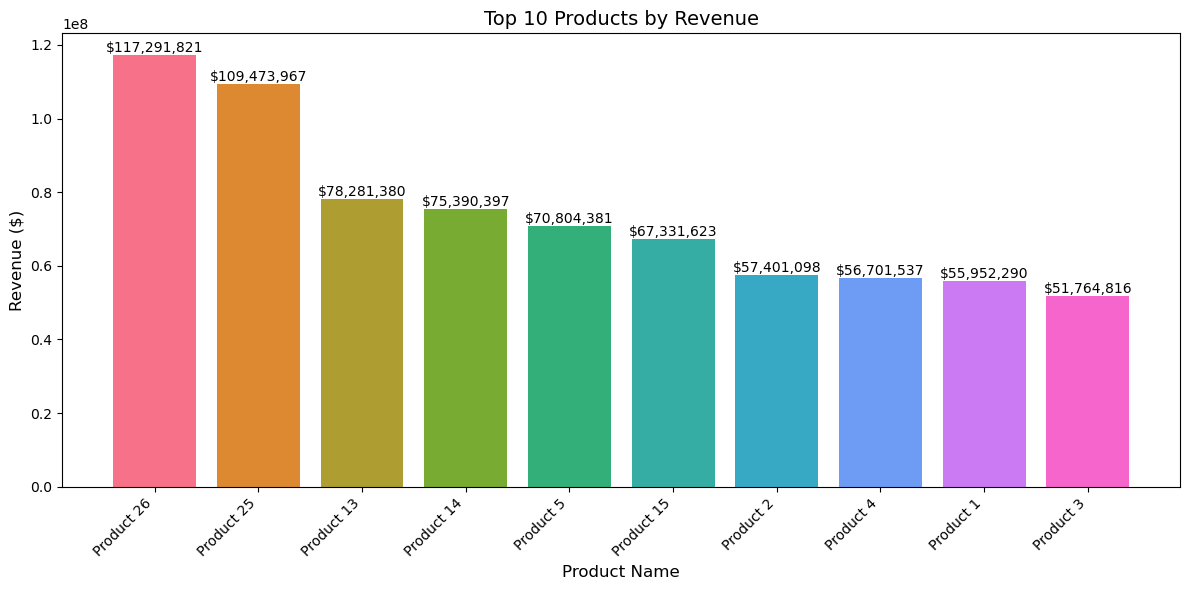

In [55]:

product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Sort by revenue in descending order and select top 10
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# Create a color palette for distinct colors
colors = sns.color_palette("husl", n_colors=len(top_10_products))

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_products['product_name'], top_10_products['revenue'], color=colors)
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'${height:,.0f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.tight_layout()

# Display the plot
plt.show()

#### Bottom 10 products

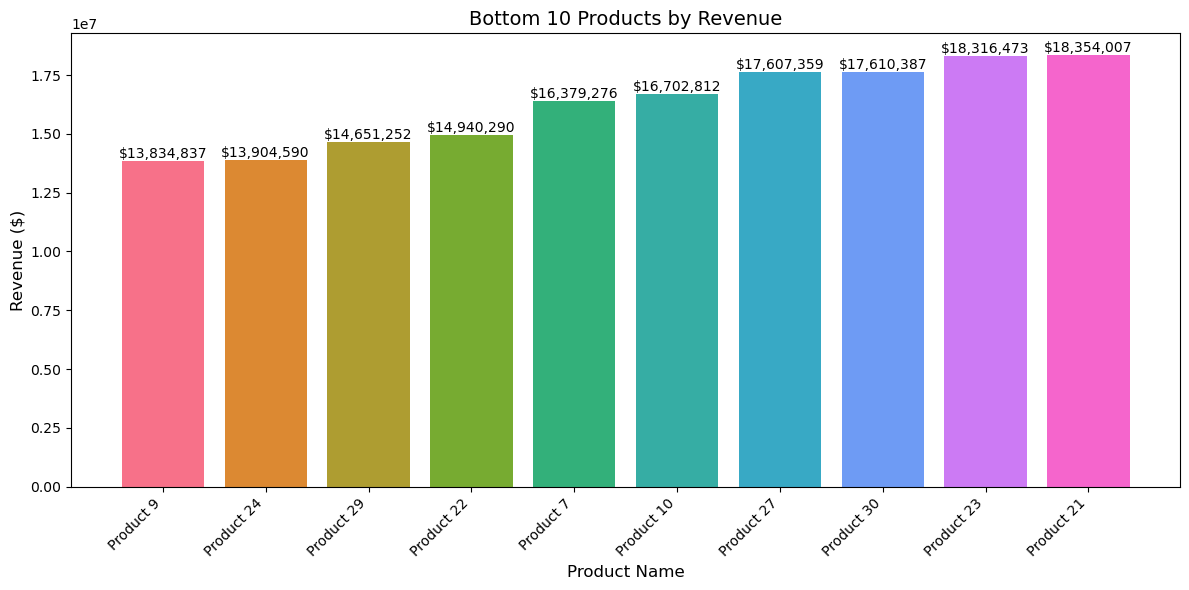

In [56]:
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()

# Sort by revenue in ascending order and select bottom 10
bottom_10_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

# Create a color palette for distinct colors
colors = sns.color_palette("husl", n_colors=len(bottom_10_products))

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(bottom_10_products['product_name'], bottom_10_products['revenue'], color=colors)
plt.title('Bottom 10 Products by Revenue', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'${height:,.0f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.tight_layout()

# Display the plot
plt.show()

#### Sales by Channels


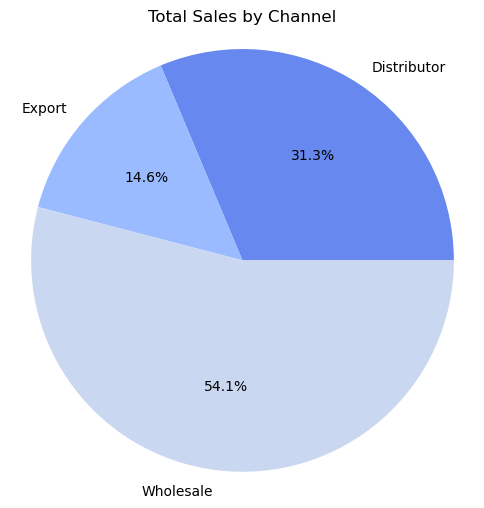

In [57]:
channel_revenue = df.groupby('channel')['revenue'].sum()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(channel_revenue, labels=channel_revenue.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm'))
plt.title('Total Sales by Channel')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Display the chart
plt.show()

## Average Order Value (AOV) Distribution

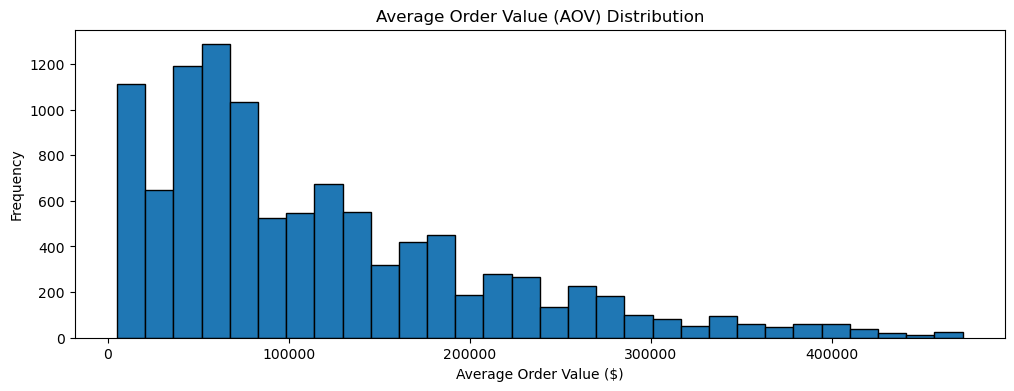

In [58]:
order_revenue = df.groupby('order_number')['revenue'].sum()

# Create a histogram
plt.figure(figsize=(12, 4))
plt.hist(order_revenue, bins=30, edgecolor='black')
plt.title('Average Order Value (AOV) Distribution')
plt.xlabel('Average Order Value ($)')
plt.ylabel('Frequency')

# Display the chart
plt.show()

In [ ]:
#unit price Distribution per product
#Top 10 sates by revenue and order_count
#Average profit margin  by Channel
#Top and bottom 10 customers by revenue
#customer segmentation: Revenue vs Profit Margin
# Correlation Heatmap 

#### unit price Distribution per product

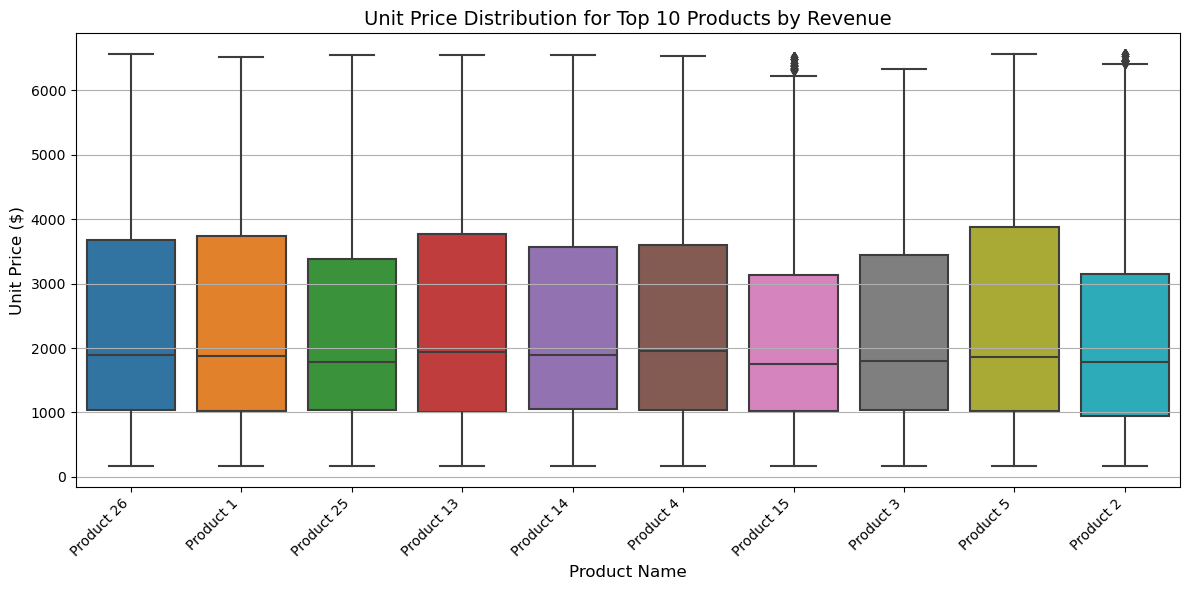

In [59]:
# Calculate total revenue per product and get top 10 products
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)['product_name'].tolist()

# Filter DataFrame to include only top 10 products
df_top_10 = df[df['product_name'].isin(top_10_products)]

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_10, x='product_name', y='unit_price', palette='tab10')

# Customize the plot
plt.title('Unit Price Distribution for Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Unit Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

#### Top 10 sates by revenue and order_count

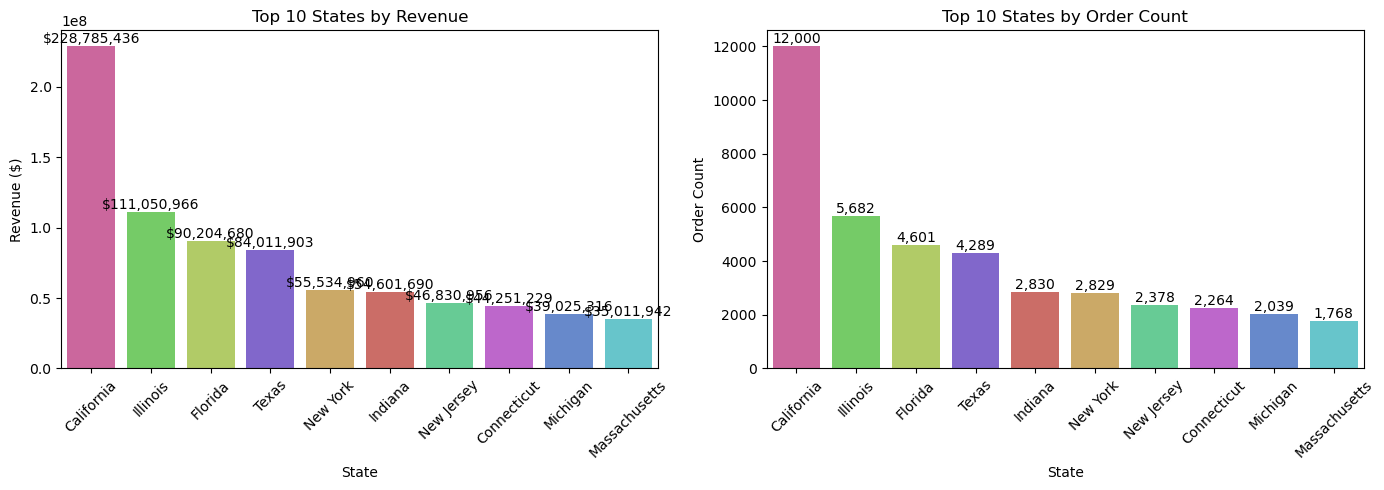

In [65]:
state_summary = df.groupby('state_name').agg({
    'revenue': 'sum',
    'order_number': 'count'
}).reset_index()

# Rename columns for clarity
state_summary = state_summary.rename(columns={'order_number': 'order_count'})

# Get top 10 states by revenue
top_10_revenue = state_summary.sort_values('revenue', ascending=False).head(10)

# Get top 10 states by order count
top_10_orders = state_summary.sort_values('order_count', ascending=False).head(10)

# Create a color palette for unique states (union of states in both top 10 lists)
all_states = list(set(top_10_revenue['state_name']).union(set(top_10_orders['state_name'])))
palette = sns.color_palette("hls", len(all_states))  # Generate distinct colors
color_dict = dict(zip(all_states, palette))  # Map each state to a color

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=False, sharey=False)

# Plot for revenue with state-specific colors
sns.barplot(x='state_name', y='revenue', data=top_10_revenue, 
            palette=[color_dict[state] for state in top_10_revenue['state_name']], ax=ax1)
ax1.set_title('Top 10 States by Revenue')
ax1.set_xlabel('State')
ax1.set_ylabel('Revenue ($)')
ax1.tick_params(axis='x', rotation=45)

# Add labels on top of revenue bars
for p in ax1.patches:
    ax1.annotate(f'${p.get_height():,.0f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

# Plot for order count with state-specific colors
sns.barplot(x='state_name', y='order_count', data=top_10_orders, 
            palette=[color_dict[state] for state in top_10_orders['state_name']], ax=ax2)
ax2.set_title('Top 10 States by Order Count')
ax2.set_xlabel('State')
ax2.set_ylabel('Order Count')
ax2.tick_params(axis='x', rotation=45)

# Add labels on top of order count bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():,.0f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Average profit margin by Channel

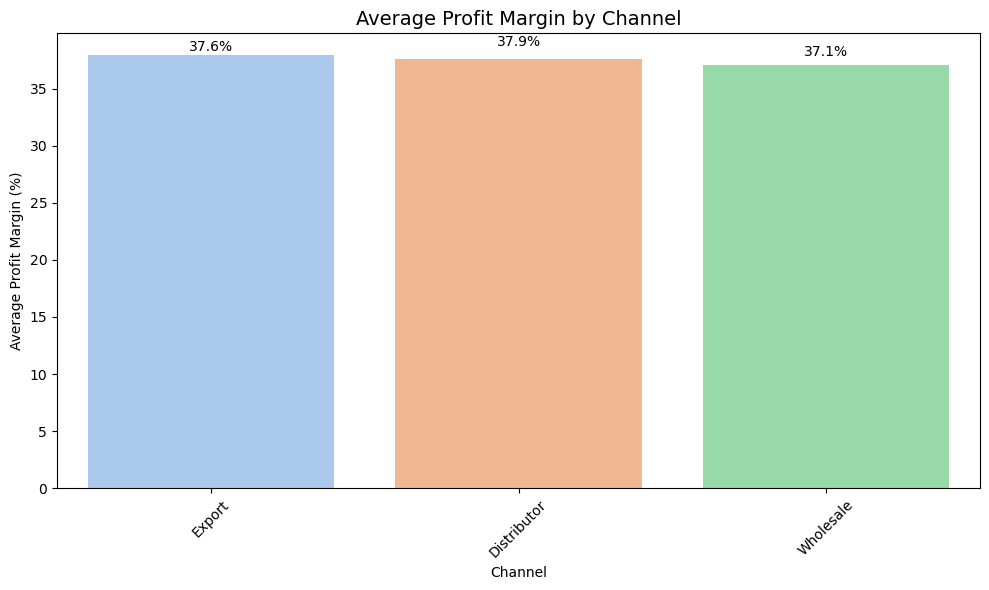

In [77]:

# Group by 'channel' and calculate average profit margin
avg_profit_margin = df.groupby('channel')['profit_margin_%'].mean().reset_index()

# Sort for better visual order
avg_profit_margin = avg_profit_margin.sort_values(by='profit_margin_%', ascending=False)

# Set light pastel color palette
sns.set_palette('pastel')

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_profit_margin, x='channel', y='profit_margin_%', hue='channel', dodge=False)

# Add value labels on bars
for i, row in avg_profit_margin.iterrows():
    ax.text(i, row['profit_margin_%'] + 0.5, f"{row['profit_margin_%']:.1f}%", 
            ha='center', va='bottom', fontsize=10)

# Remove legend since color already maps to channel (x-axis)
ax.legend_.remove()

# Titles and labels
plt.title('Average Profit Margin by Channel', fontsize=14)
plt.xlabel('Channel')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Top and bottom 10 customers by revenue

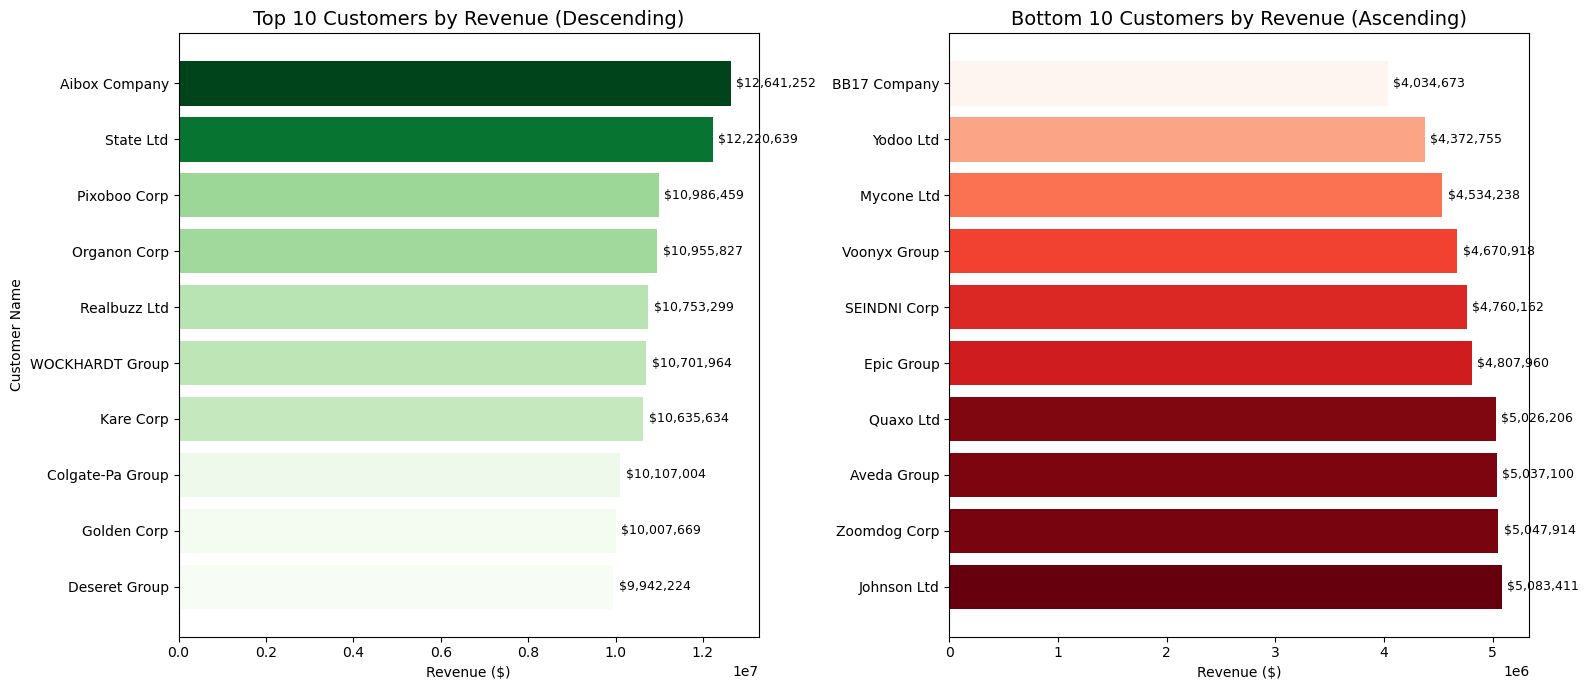

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure revenue column is clean and numeric
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df = df[df['revenue'].notnull() & ~df['revenue'].isin([float('inf'), float('-inf')])]

# Group by customer and sum revenue
customer_revenue = df.groupby('customer_name')['revenue'].sum().reset_index()

# --- Top 10 Customers ---
top_10 = customer_revenue.sort_values(by='revenue', ascending=False).head(10).copy()
top_10 = top_10.sort_values(by='revenue', ascending=True)  # For better barh display

# --- Bottom 10 Customers ---
bottom_10 = customer_revenue.sort_values(by='revenue', ascending=True).head(10).copy()
bottom_10 = bottom_10.sort_values(by='revenue', ascending=False)

# Color gradients
top_norm = plt.Normalize(top_10['revenue'].min(), top_10['revenue'].max())
top_colors = plt.cm.Greens(top_norm(top_10['revenue']))

bottom_norm = plt.Normalize(bottom_10['revenue'].min(), bottom_10['revenue'].max())
bottom_colors = plt.cm.Reds(bottom_norm(bottom_10['revenue']))

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=False)

# --- Plot Top 10 ---
axes[0].barh(top_10['customer_name'], top_10['revenue'], color=top_colors)
axes[0].set_title('Top 10 Customers by Revenue (Descending)', fontsize=14)
axes[0].set_xlabel('Revenue ($)')
axes[0].set_ylabel('Customer Name')

for bar in axes[0].patches:
    width = bar.get_width()
    axes[0].text(width + 0.01 * top_10['revenue'].max(),
                 bar.get_y() + bar.get_height() / 2,
                 f"${width:,.0f}", va='center', fontsize=9)

# --- Plot Bottom 10 ---
axes[1].barh(bottom_10['customer_name'], bottom_10['revenue'], color=bottom_colors)
axes[1].set_title('Bottom 10 Customers by Revenue (Ascending)', fontsize=14)
axes[1].set_xlabel('Revenue ($)')
axes[1].set_ylabel('')  # Already shown on the left plot

for bar in axes[1].patches:
    width = bar.get_width()
    axes[1].text(width + 0.01 * bottom_10['revenue'].max(),
                 bar.get_y() + bar.get_height() / 2,
                 f"${width:,.0f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


## customer segmentation: Revenue vs Profit Margin

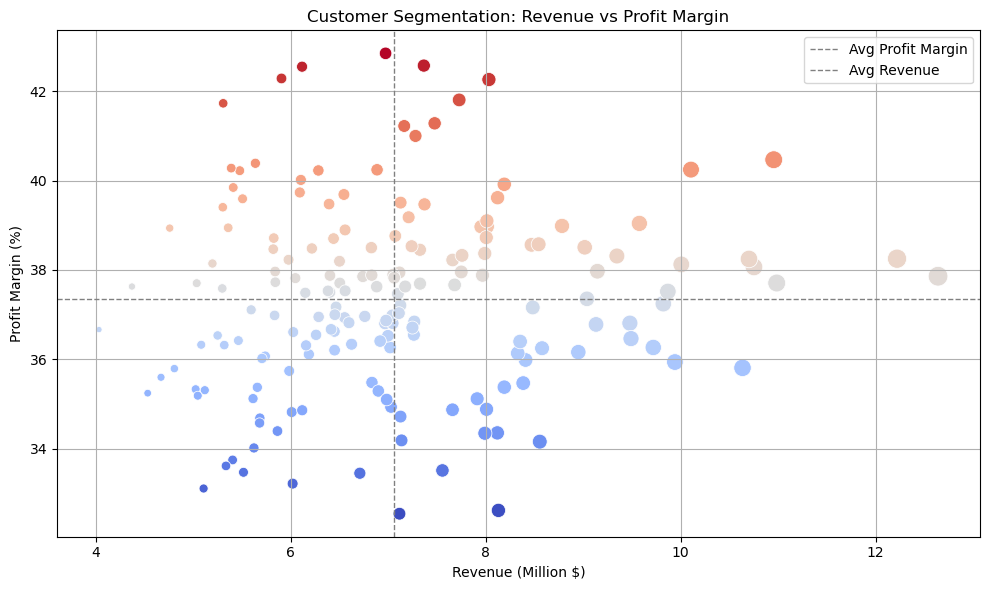

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and ensure numeric columns
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['profit_margin_%'] = pd.to_numeric(df['profit_margin_%'], errors='coerce')
df = df.dropna(subset=['revenue', 'profit_margin_%'])

# Group by customer (you can group by other variables if desired)
segmentation = df.groupby('customer_name').agg({
    'revenue': 'sum',
    'profit_margin_%': 'mean'
}).reset_index()

# Optional: create revenue in millions
segmentation['revenue_million'] = segmentation['revenue'] / 1_000_000

# Plot: revenue vs profit margin
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=segmentation,
    x='revenue_million',
    y='profit_margin_%',
    hue='profit_margin_%',
    palette='coolwarm',
    size='revenue_million',
    sizes=(20, 200),
    legend=False
)

# Formatting
plt.title('Customer Segmentation: Revenue vs Profit Margin')
plt.xlabel('Revenue (Million $)')
plt.ylabel('Profit Margin (%)')
plt.axhline(y=segmentation['profit_margin_%'].mean(), color='gray', linestyle='--', linewidth=1, label='Avg Profit Margin')
plt.axvline(x=segmentation['revenue_million'].mean(), color='gray', linestyle='--', linewidth=1, label='Avg Revenue')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


## Correlation heatmap

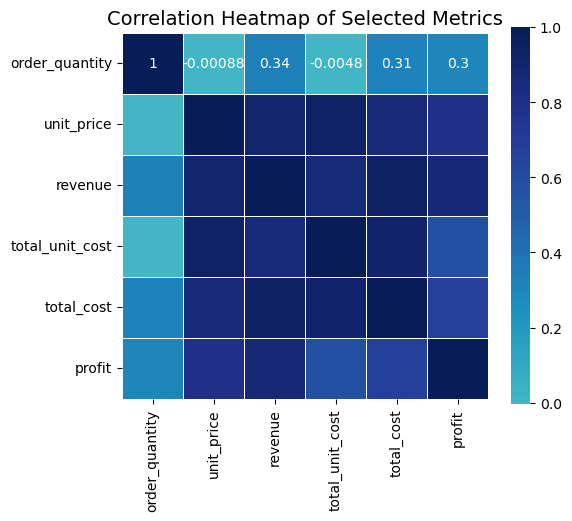

In [126]:
# Select relevant columns for correlation
columns_to_correlate = [
    'order_quantity', 
    'unit_price', 
    'revenue', 
    'total_unit_cost', 
    'total_cost', 
    'profit'
]

# Compute the correlation matrix
corr_matrix = df[columns_to_correlate].corr()

# Set the size of the heatmap
plt.figure(figsize=(6, 6))

# Create the heatmap with a light color palette
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='YlGnBu',       # Light and readable color palette
    center=0,
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": .75}
)

# Add a title
plt.title('Correlation Heatmap of Selected Metrics', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [128]:
# Save the DataFrame to a CSV file
df_new.to_csv('Sales_data.csv', index=False)
